In [78]:
import pandas as pd
import matplotlib.pyplot as plt


In [79]:
df = pd.read_csv('water.csv')

In [80]:
df

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


### 1 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график

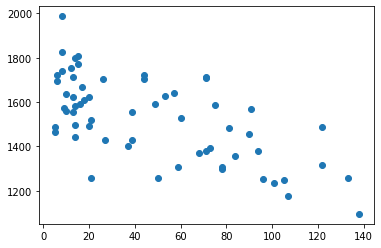

In [81]:
plt.scatter(df['hardness'], df['mortality'])

Возможно есть обратная взаимосвязь,  графически она немного прослеживается.


Рассчитать коэффициенты корреляции Пирсона и Спирмена

In [82]:
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [83]:
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [84]:
df[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.453753
hardness,-0.453753,1.000000


Коэффициент корреляции Спирмена немного меньше коэффициента Пирсона, и оба они говорят о присутствии несильной обратной связи, подтверждая графическое отображение

Построить модель линейной регрессии
Рассчитать коэффициент детерминации

In [85]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [86]:
X = df[['hardness']].values
Y = df['mortality'].values

In [87]:
X = sm.add_constant(X)

In [88]:
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     44.30
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           1.03e-08
Time:                        12:35:53   Log-Likelihood:                -388.28
No. Observations:                  61   AIC:                             780.6
Df Residuals:                      59   BIC:                             784.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1676.3556     29.298     57.217      0.0

In [89]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [1676.3556007    -3.22609161]
R2:  0.42882671931249716


Значение коэффициента детерминации говорит о том, что модель достаточно посредственно описывает зависимость данных.


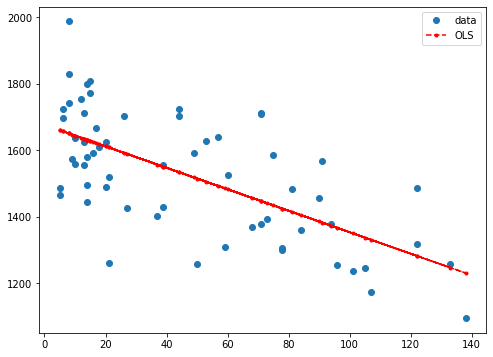

In [90]:
prstd, iv_l, iv_u = wls_prediction_std(results)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X[:,1], Y, 'o', label="data")
ax.plot(X[:,1], results.fittedvalues, 'r--.', label="OLS")

ax.legend(loc='best');





Вывести график остатков

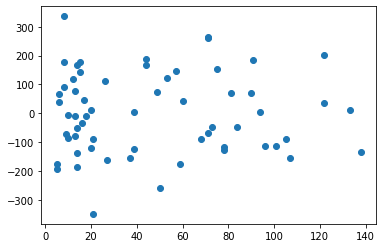

In [91]:
plt.scatter(X[:, 1], results.resid)

(array([ 1.,  1.,  7., 13.,  9.,  8.,  9.,  9.,  3.,  1.]),
 array([-348.60767697, -280.10159606, -211.59551515, -143.08943423,
         -74.58335332,   -6.07727241,   62.4288085 ,  130.93488941,
         199.44097033,  267.94705124,  336.45313215]),
 <a list of 10 Patch objects>)

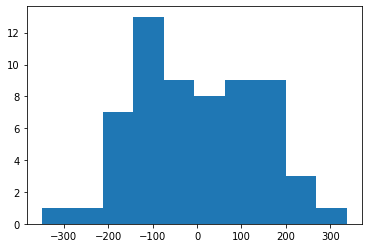

In [92]:
plt.hist(results.resid)

### 2 Задача - Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

#### Север

In [93]:
north = df[df.location == 'North']
north

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15
8,9,North,Bradford,1637,10
11,12,North,Burnley,1755,12
15,16,North,Darlington,1491,20
16,17,North,Derby,1555,39
17,18,North,Doncaster,1428,39


Построить точечный график

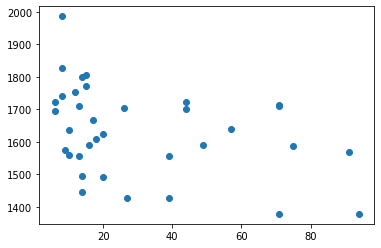

In [94]:
plt.scatter(north['hardness'], north['mortality'])

Взаимосвязь между данными графически слабо прослеживается.


Рассчитать коэффициенты корреляции Пирсона и Спирмена

In [95]:
north[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [96]:
north[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [97]:
north[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.283058
hardness,-0.283058,1.000000


Коэффициенты корреляции Спирмена и Пирсона свидетельствуют о очень слабой обратной связи. 

Построить модель линейной регрессии
Рассчитать коэффициент детерминации

In [98]:
X = north[['hardness']].values
Y = north['mortality'].values

In [99]:
X = sm.add_constant(X)

In [100]:
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     5.188
Date:                Tue, 17 Nov 2020   Prob (F-statistic):             0.0293
Time:                        12:35:55   Log-Likelihood:                -218.78
No. Observations:                  35   AIC:                             441.6
Df Residuals:                      33   BIC:                             444.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1692.3128     33.785     50.091      0.0

In [101]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [1692.31280143   -1.93134215]
R2:  0.13586436642071753


Значение коэффициента детерминации говорит о том, что модель крайне слабо описывает зависимость данных.


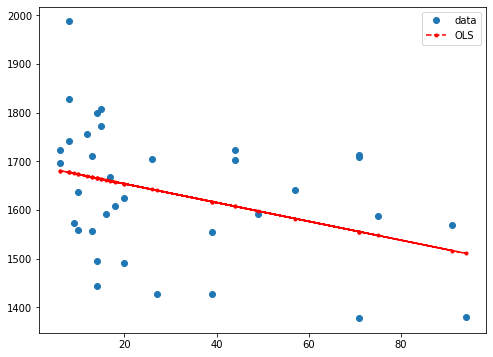

In [102]:
prstd, iv_l, iv_u = wls_prediction_std(results)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X[:,1], Y, 'o', label="data")
ax.plot(X[:,1], results.fittedvalues, 'r--.', label="OLS")

ax.legend(loc='best');





Вывести график остатков

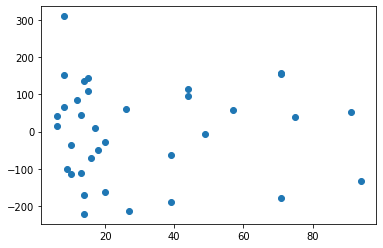

In [103]:
plt.scatter(X[:, 1], results.resid)

(array([5., 3., 4., 3., 6., 6., 4., 3., 0., 1.]),
 array([-221.2740113 , -168.13281659, -114.99162188,  -61.85042717,
          -8.70923247,   44.43196224,   97.57315695,  150.71435166,
         203.85554637,  256.99674108,  310.13793579]),
 <a list of 10 Patch objects>)

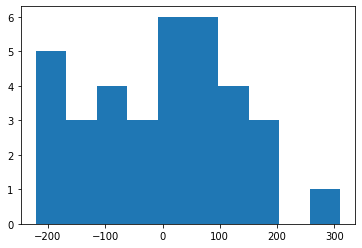

In [104]:
plt.hist(results.resid)

#### Юг

In [105]:
south = df[df.location == 'South']
south

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73
12,13,South,Cardiff,1519,21
13,14,South,Coventry,1307,78
14,15,South,Croydon,1254,96
18,19,South,East Ham,1318,122
19,20,South,Exeter,1260,21


Построить точечный график

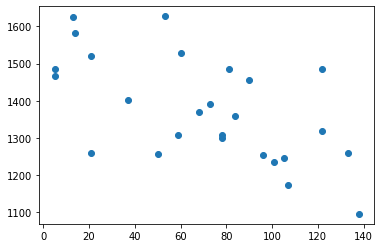

In [106]:
plt.scatter(south['hardness'], south['mortality'])

Взаимосвязь между данными графически слабо прослеживается.


Рассчитать коэффициенты корреляции Пирсона и Спирмена

In [107]:
south[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [108]:
south[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [109]:
south[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.440315
hardness,-0.440315,1.000000


Коэффициенты корреляции Спирмена и Пирсона свидетельствуют о средней обратной связи. 

Построить модель линейной регрессии
Рассчитать коэффициент детерминации

In [110]:
X = south[['hardness']].values
Y = south['mortality'].values

In [111]:
X = sm.add_constant(X)

In [112]:
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     13.65
Date:                Tue, 17 Nov 2020   Prob (F-statistic):            0.00113
Time:                        12:35:57   Log-Likelihood:                -159.06
No. Observations:                  26   AIC:                             322.1
Df Residuals:                      24   BIC:                             324.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1522.8150     45.431     33.519      0.0

In [113]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [1522.81504854   -2.09271845]
R2:  0.3625885624364602


Значение коэффициента детерминации говорит о том, что модель слабо описывает зависимость данных.


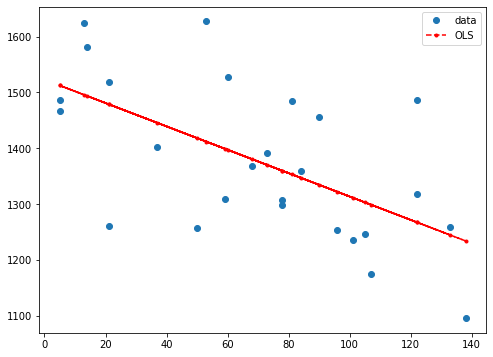

In [114]:
prstd, iv_l, iv_u = wls_prediction_std(results)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X[:,1], Y, 'o', label="data")
ax.plot(X[:,1], results.fittedvalues, 'r--.', label="OLS")

ax.legend(loc='best');





Вывести график остатков

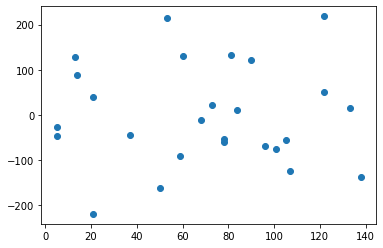

In [115]:
plt.scatter(X[:, 1], results.resid)

(array([1., 2., 2., 6., 3., 4., 1., 4., 1., 2.]),
 array([-2.18867961e+02, -1.75131505e+02, -1.31395049e+02, -8.76585922e+01,
        -4.39221359e+01, -1.85679612e-01,  4.35507767e+01,  8.72872330e+01,
         1.31023689e+02,  1.74760146e+02,  2.18496602e+02]),
 <a list of 10 Patch objects>)

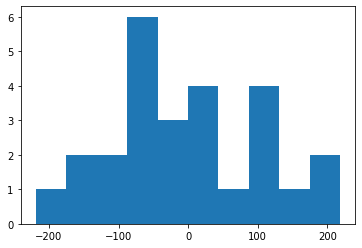

In [116]:
plt.hist(results.resid)

Выводы: На основе данного анализа можно сделать выводы о том, что в целом связь между жестокостью воды и смертностью отрицательная и прослеживается средне. При этом наилучшие результаты (коэффициенты корреляции и детерменации) показывает анализ региона в целом, возможно, в силу большого количества данных. При этом показатели по югу ближе к показателям в целом по региону, в то время как показатели по северу говорят о крайне слабой связи наблюдаемых величин.